In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter, find_peaks
from sklearn import decomposition

import mne

import os


import glob

from utils import *

from time import sleep

In [2]:
foldername = '../../../Originals/procesados/'

In [3]:
filenames = sorted(os.listdir(foldername))

# Concatenación de todos los eeg data

In [4]:
all_eeg_data = []
for f in filenames:
    eeg_data, _, _, _ = get_egg_data(foldername + f)
    all_eeg_data.append(eeg_data)

In [5]:
df_all_eeg_data = pd.concat([pd.DataFrame(x.T) for x in all_eeg_data])

In [6]:
df_all_eeg_data.reset_index(inplace=True, drop=True)

In [7]:
all_eeg_data_numpy = df_all_eeg_data.to_numpy()

# Tarea 1: Inspección de los mapas topográficos para los máximos de GFP

### No entiendo muy bien que se refiere con esto 
Encontrar los picos máximos del GFP (PGF P ), guardar los mapas para cada máximo
( ~xn). \ 
Estudiar la presencia de mapas outliers. Para ello puede usar PCA y/o clustering jerarquico y/o matriz de distancias.

In [8]:
gfp = df_all_eeg_data.T.std(ddof=0)

In [9]:
gfp

0        4.072512
1        4.682868
2        5.190481
3        5.935945
4        6.849898
           ...   
76805    4.179211
76806    4.359270
76807    4.397674
76808    4.072202
76809    4.214761
Length: 76810, dtype: float64

In [10]:
peaks, _ = find_peaks(gfp, height=(0,np.inf),distance=10)

In [11]:
peaks.shape

(5282,)

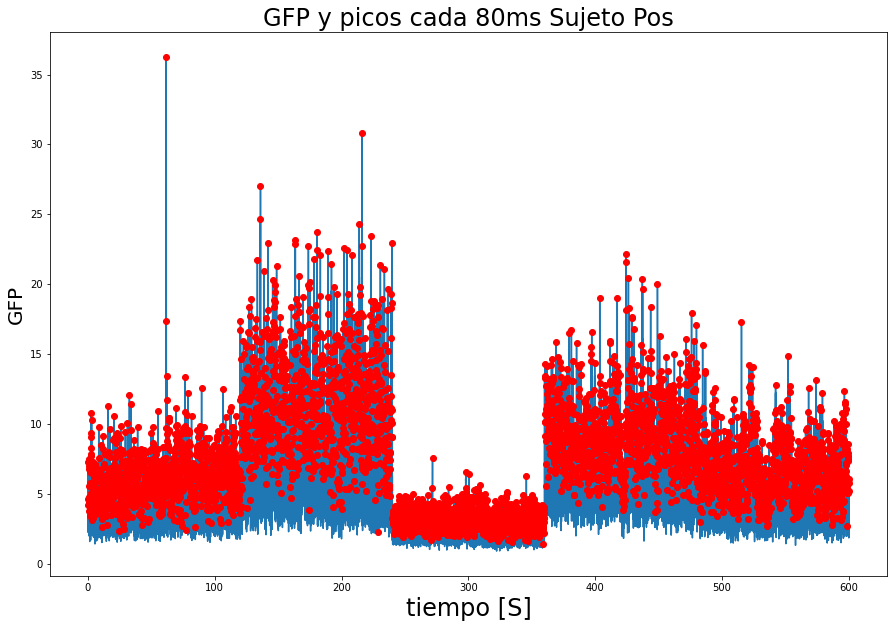

In [12]:
plt.figure(figsize=(15,10))
s_rate = 128
start=0
end=60

x = np.arange(0, df_all_eeg_data.T.shape[1])/128
#y = gfp.
plt.plot(x, gfp.values)
plt.xlabel('tiempo [S]', fontsize=24)
plt.ylabel('GFP', fontsize=20)
plt.title(f'GFP y picos cada 80ms Sujeto Pos', fontsize=24)
peaks, _ = find_peaks(gfp, height=(0,np.inf),distance=10)
for ind in peaks:
    plt.plot(x[ind],gfp[ind],'ro')

# plt.savefig(f'../images/grafico_GFP_sujeto_{sujeto}_pos')
plt.show()

# Tarea 2: Calculo de microestados utilizando k-means modificados
Aplicar el algoritmo de K-means modificado sobre los PGF P . Utilizar k = 2 − 10. ¿Es necesario repetir el procedimiento más de una vez para cada valor de k?
Decidir el mejor valor de k. Calcular el promedio de Silhoutte, el parámetro de Validación Cruzada y la Variancia global explicada para cada k. Relizar gráfico de las tres medidas para el k correspondiente.
Para el valor de k óptimo realizar el perfil de Silhoutte completo. Inspeccionar, a partir de esta última figura, la presencia de outliers, si es necesario descartarlos del análisis y volver a calcular los clusters para este valor de k.

In [13]:
from utils import kmeans3

In [14]:
kmeans3(gfp, peaks, 2)

IndexError: tuple index out of range

# Tarea 3: Validación externa de los microestados
Realizar al menos dos métodos de clustering diferentes para los ~xn. Determinar la distancia que va a utilizar. Justificar brevemente porque se eligen esos métodos y nociones de distancia. Realice una inspección de las características de los clusters hallados y de los prototipos de cada cluster en caso que los hubiese (o de ejemplos en el caso que no), comparar con los encontrados por el método de k-means modificado.
Calcular la matriz de confusión entre algoritmos. Determinar el índice Rand.

# Tarea 4: Visualización
Para los distintos algoritmos, visualizar los datos y las etiquetas de cluster asignadas en baja dimensión con alguna técnica de reducción (PCA, TSNE, MDS, etc). Esto se puede repetir para alguna variación que encuentren interesante, como para distintos valores de k o distintas nociones de distancia.

# Tarea 5: Comparación de medidas de los microestados
Calcule el ajuste de los datos de EEG a los prototipos de microestados hallados en la
Tarea 2 para cada registro. Realice un suavizado de las series temporales (puede utilizar
una ventana promedio móvil) y asigne a cada punto temporal el mapa prototipo que presente
mayor correlación.
A partir de aca debe elegir al menos uno de los siguientes medidas para comparar entre
ambas condiciones experimentales (antes y después del aprendizaje): (ver medidas en d’Croz
-Baron y colaboradores [3])
Duración promedio de cada microestado.
Frecuencia de ocurrencia.
Fracción de tiempo cubierto.
Global Explanined Variance.